In [52]:
import httpmodel
import scipy.stats
import numpy as np
import matplotlib.pyplot

# Set up a model by connecting to URL
model = httpmodel.HTTPModel("https://demo.linusseelinger.de")

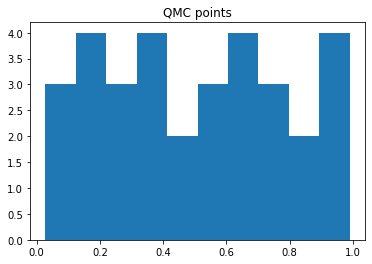

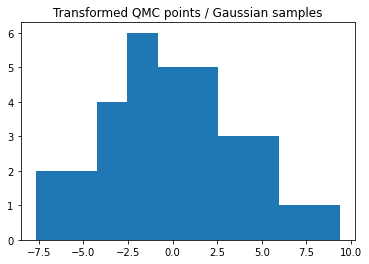

In [53]:
sobol = scipy.stats.qmc.Sobol(1)
points = sobol.random_base2(5) # Generate QMC points (uniform dist. on unit hypercube)

matplotlib.pyplot.title("QMC points")
matplotlib.pyplot.hist(points)
matplotlib.pyplot.show()

norm = scipy.stats.norm(0,4)
samples = norm.ppf(points) #Inverse CDF, result is normal distributed

matplotlib.pyplot.title("Transformed QMC points / Gaussian samples")
matplotlib.pyplot.hist(samples)
matplotlib.pyplot.show()

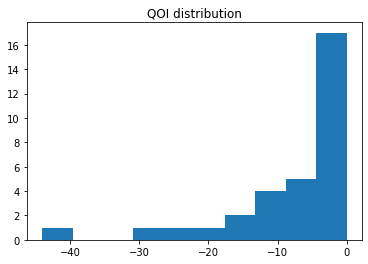

In [55]:
qoi = np.empty(samples.shape)

for i in range(0,len(samples)):
  qoi[i] = model(0,samples[i].tolist())

matplotlib.pyplot.title("QOI distribution")
matplotlib.pyplot.hist(qoi)
matplotlib.pyplot.show()